In [1]:
# Priting over 1 line of code within the same cell

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
#libraries and visualization
import pandas as pd
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup
import random
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from time import sleep
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
url= 'https://www.billboard.com/charts/hot-100'

In [3]:
#previously done in a lab
Billboard= pd.read_csv('Billboard.csv')
Billboard.head()

Unnamed: 0                                          artist  \
0           0                                          Polo G   
1           1        Silk Sonic (Bruno Mars & Anderson .Paak)   
2           2  Justin Bieber Featuring Daniel Caesar & Giveon   
3           3                                       Lil Nas X   
4           4                       Dua Lipa Featuring DaBaby   

                            title  
0                         Rapstar  
1             Leave The Door Open  
2                         Peaches  
3  Montero (Call Me By Your Name)  
4                      Levitating

In [4]:
url2= 'https://www.officialcharts.com/charts/singles-chart/'

In [5]:
#download html with a get request
response = requests.get(url2)

In [6]:
# parse the element
soup = BeautifulSoup(response.content, "html.parser")

In [7]:
soup.select("div > div.title-artist > div.title > a")

[<a href="/search/singles/bad-habits/">BAD HABITS</a>,
 <a href="/search/singles/stay/">STAY</a>,
 <a href="/search/singles/remember/">REMEMBER</a>,
 <a href="/search/singles/black-magic/">BLACK MAGIC</a>,
 <a href="/search/singles/visiting-hours/">VISITING HOURS</a>,
 <a href="/search/singles/happier-than-ever/">HAPPIER THAN EVER</a>,
 <a href="/search/singles/industry-baby/">INDUSTRY BABY</a>,
 <a href="/search/singles/wasted/">WASTED</a>,
 <a href="/search/singles/talk-about/">TALK ABOUT</a>,
 <a href="/search/singles/out-out/">OUT OUT</a>,
 <a href="/search/singles/need-to-know/">NEED TO KNOW</a>,
 <a href="/search/singles/clash/">CLASH</a>,
 <a href="/search/singles/fly-away/">FLY AWAY</a>,
 <a href="/search/singles/kiss-my-(uh-oh)/">KISS MY (UH OH)</a>,
 <a href="/search/singles/traitor/">TRAITOR</a>,
 <a href="/search/singles/essence/">ESSENCE</a>,
 <a href="/search/singles/take-my-breath/">TAKE MY BREATH</a>,
 <a href="/search/singles/good-4-u/">GOOD 4 U</a>,
 <a href="/search/

In [8]:
# pulling the artist name selectors
soup.select("div > div.title-artist > div.artist > a")

[<a href="/artist/6692/ed-sheeran/">ED SHEERAN</a>,
 <a href="/artist/60619/kid-laroi-and-justin-bieber/">KID LAROI &amp; JUSTIN BIEBER</a>,
 <a href="/artist/60485/becky-hill-and-david-guetta/">BECKY HILL &amp; DAVID GUETTA</a>,
 <a href="/artist/59889/jonasu/">JONASU</a>,
 <a href="/artist/6692/ed-sheeran/">ED SHEERAN</a>,
 <a href="/artist/52396/billie-eilish/">BILLIE EILISH</a>,
 <a href="/artist/60718/lil-nas-x-and-jack-harlow/">LIL NAS X &amp; JACK HARLOW</a>,
 <a href="/artist/60850/digga-d-ft-arrdee/">DIGGA D FT ARRDEE</a>,
 <a href="/artist/60487/rain-radio-dj-craig-gorman/">RAIN RADIO/DJ CRAIG GORMAN</a>,
 <a href="/artist/60851/joel-corry-jones-charli-xcx/">JOEL CORRY/JONES/CHARLI XCX</a>,
 <a href="/artist/56601/doja-cat/">DOJA CAT</a>,
 <a href="/artist/60618/dave-ft-stormzy/">DAVE FT STORMZY</a>,
 <a href="/artist/56050/tones-and-i/">TONES &amp; I</a>,
 <a href="/artist/60719/anne-marie-and-little-mix/">ANNE-MARIE &amp; LITTLE MIX</a>,
 <a href="/artist/56921/olivia-rodri

In [9]:
title2= []
artist2 = []

num_iter = len(soup.select("div > div.title-artist > div.title > a"))

# iterate through the result set and retrive all the data
for i in range(num_iter):
    title2.append(soup.select("div > div.title-artist > div.title > a")[i].get_text())
    artist2.append(soup.select("div > div.title-artist > div.artist > a")[i].get_text())
    
num_iter = len(soup.select("div > div.title-artist > div.artist > a"))

print(title2)
print(artist2)

['BAD HABITS', 'STAY', 'REMEMBER', 'BLACK MAGIC', 'VISITING HOURS', 'HAPPIER THAN EVER', 'INDUSTRY BABY', 'WASTED', 'TALK ABOUT', 'OUT OUT', 'NEED TO KNOW', 'CLASH', 'FLY AWAY', 'KISS MY (UH OH)', 'TRAITOR', 'ESSENCE', 'TAKE MY BREATH', 'GOOD 4 U', 'WID IT', 'WOMAN', 'LET THEM KNOW', "I GUESS I'M IN LOVE", '2055', 'RUMORS', 'HEARTBREAK ANTHEM', 'YOU FOR ME', 'JUST FOR ME', 'LEAVE BEFORE YOU LOVE ME', 'VERDANSK', 'I WANNA BE YOUR SLAVE', 'SAVE YOUR TEARS', 'HOLIDAY', 'DRIVE', 'IN THE FIRE', 'COLD HEART', 'BEGGIN', 'BY YOUR SIDE', 'KISS ME MORE', 'PAIN', "DON'T GO YET", 'MONTERO (CALL ME BY YOUR NAME)', 'CHOSEN', 'IF YOU REALLY LOVE ME (HOW WILL I KNOW)', 'LEVITATING', 'JEALOUSY JEALOUSY', 'LOSE', 'RHYTHM & VIBES', 'MOOD RING', 'BLINDING LIGHTS', 'ALONE WITH YOU', "ROLLIN'", 'SOLAR POWER', 'BETTER DAYS', 'BED', 'EXCUSES', "DON'T GO", 'SEVENTEEN GOING UNDER', 'LITTLE BIT OF LOVE', 'ALL I KNOW SO FAR', 'HEAT WAVES', 'HEAD & HEART', 'SUMMER OF LOVE', 'BODY', 'LOVE AGAIN', 'LIFE GOES ON', 'L

In [10]:
print(artist2)

['ED SHEERAN', 'KID LAROI & JUSTIN BIEBER', 'BECKY HILL & DAVID GUETTA', 'JONASU', 'ED SHEERAN', 'BILLIE EILISH', 'LIL NAS X & JACK HARLOW', 'DIGGA D FT ARRDEE', 'RAIN RADIO/DJ CRAIG GORMAN', 'JOEL CORRY/JONES/CHARLI XCX', 'DOJA CAT', 'DAVE FT STORMZY', 'TONES & I', 'ANNE-MARIE & LITTLE MIX', 'OLIVIA RODRIGO', 'WIZKID FT TEMS', 'WEEKND', 'OLIVIA RODRIGO', 'TION WAYNE & ARRDEE', 'DOJA CAT', 'MABEL', 'CLINTON KANE', 'SLEEPY HALLOW', 'LIZZO FT CARDI B', 'GALANTIS/GUETTA/LITTLE MIX', 'SIGALA & RITA ORA', 'PINKPANTHERESS', 'MARSHMELLO/JONAS BROTHERS', 'DAVE', 'MANESKIN', 'WEEKND', 'KSI', 'CLEAN BANDIT/TOPIC/WES NELSON', 'DAVE', 'ELTON JOHN & DUA LIPA', 'MANESKIN', 'CALVIN HARRIS FT TOM GRENNAN', 'DOJA CAT FT SZA', 'PINKPANTHERESS', 'CAMILA CABELLO', 'LIL NAS X', 'BLXST/TYGA/TY DOLLA SIGN', 'DAVID GUETTA/MISTAJAM/NEWMAN', 'DUA LIPA', 'OLIVIA RODRIGO', 'KSI & LIL WAYNE', 'TOBI & MANNY', 'LORDE', 'WEEKND', 'ARZ', 'MIST FT BURNA BOY', 'LORDE', 'DERMOT KENNEDY', 'JOEL CORRY/RAYE/DAVID GUETTA', '

In [11]:
# each list becomes a column
Billboard2 = pd.DataFrame({"artist":artist2,
                          "title":title2
    
                      })

In [12]:
Billboard2.head()

artist           title
0                 ED SHEERAN      BAD HABITS
1  KID LAROI & JUSTIN BIEBER            STAY
2  BECKY HILL & DAVID GUETTA        REMEMBER
3                     JONASU     BLACK MAGIC
4                 ED SHEERAN  VISITING HOURS

In [13]:
def top100():
    x=random.choice(Billboard['title'])
    user_choice= input('Choose a song from the Billboard TOP100:')
    
    if user_choice not in list(Billboard['title']):
        print('Sorry, this song is not included in the TOP100! Try with another song')
    else:
        print('If you like', user_choice, 'Try with this song from the TOP100:', x)

In [14]:
top100()

Choose a song from the Billboard TOP100:Rapstar
If you like Rapstar Try with this song from the TOP100: Chasing After You


In [15]:
def top100():
    x=random.choice(Billboard2['title'])
    user_choice= input('Choose a song from the Billboard TOP100:')
    
    if user_choice not in list(Billboard['title']):
        print('Sorry, this song is not included in the TOP100! Try with another song')
    else:
        print('If you like', user_choice, 'You also will like', x)

In [16]:
top100()

Choose a song from the Billboard TOP100:Peaches
If you like Peaches You also will like LITTLE BIT OF LOVE


In [17]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='<your client id here>',
                                                           client_secret='<your client secret here>'))

In [18]:
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
secrets_dict={}
for line in string.split('\n'):
    secrets_dict[line.split('=')[0]]=line.split('=')[1]

In [19]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id =secrets_dict['cid'], client_secret=secrets_dict['csecret']))

In [20]:
playlist = sp.user_playlist_tracks("spotify", "6SwcgDZO2oO9w3H7NN7rHG")
#first argument -- user, default is spotify meaning general public user
#second argument - id of the playlist

In [21]:
playlist.keys() 

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [22]:
playlist["items"][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [23]:
playlist["items"][0]["track"]

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6evKD5JWJON3qPBJtUEmtY'},
    'href': 'https://api.spotify.com/v1/artists/6evKD5JWJON3qPBJtUEmtY',
    'id': '6evKD5JWJON3qPBJtUEmtY',
    'name': 'G-Unit',
    'type': 'artist',
    'uri': 'spotify:artist:6evKD5JWJON3qPBJtUEmtY'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   'HT',
   'HU',
   'ID',
   'IE',
   'I

In [24]:
playlist["items"][0]["track"]["name"]

'Ready Or Not'

In [25]:
playlist["total"] 

10000

In [26]:
def get_name_artists_from_track(track):
    return[(track['name'],artist['name'])for artist in track['artists']]

In [27]:
get_name_artists_from_track(playlist['items'][0]['track'])

[('Ready Or Not', 'G-Unit')]

In [28]:
def get_name_artist_from_playlist_item(playlist_item):
  return get_name_artists_from_track(playlist_item['track'])

In [29]:
get_name_artist_from_playlist_item(playlist["items"][1])

[('Too Much', 'The Game')]

In [30]:
def get_name_artists_from_playlist(input_playlist):
  return list(map(get_name_artist_from_playlist_item,input_playlist["items"]))

In [31]:
get_name_artists_from_playlist(playlist)

[[('Ready Or Not', 'G-Unit')],
 [('Too Much', 'The Game')],
 [('Hello - Feat. Dr. Dre And MC Ren', 'Ice Cube')],
 [("Sittin' On Chrome", 'Masta Ace Incorporated')],
 [('Triumph (feat. Cappadonna)', 'Wu-Tang Clan'),
  ('Triumph (feat. Cappadonna)', 'Cappadonna')],
 [('I Shot Ya - Remix', 'LL Cool J'),
  ('I Shot Ya - Remix', 'Fat Joe'),
  ('I Shot Ya - Remix', 'Foxy Brown'),
  ('I Shot Ya - Remix', 'Keith Murray'),
  ('I Shot Ya - Remix', 'Prodigy')],
 [('Quiet Storm', 'Mobb Deep')],
 [('Thug Muzik', 'Mobb Deep')],
 [('Where Ya Heart At', 'Mobb Deep')],
 [('Adrenaline', 'Mobb Deep')],
 [('Allustrious', 'Mobb Deep')],
 [("Temperature's Rising (feat. Crystal Johnson)", 'Mobb Deep'),
  ("Temperature's Rising (feat. Crystal Johnson)", 'Crystal Johnson')],
 [('Shook Ones, Pt. II', 'Mobb Deep')],
 [('Get Away', 'Mobb Deep')],
 [('Have A Party', 'Mobb Deep'),
  ('Have A Party', '50 Cent'),
  ('Have A Party', 'Nate Dogg')],
 [('Stuck On You', 'Prodigy')],
 [("Bang On 'em", 'Prodigy')],
 [('U Go

In [32]:
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

In [33]:
#now flattening it
def get_name_artists_from_playlist(input_playlist):
  return flatten(list(map(get_name_artist_from_playlist_item,input_playlist["items"])))

In [34]:
get_name_artists_from_playlist(playlist)

[('Ready Or Not', 'G-Unit'),
 ('Too Much', 'The Game'),
 ('Hello - Feat. Dr. Dre And MC Ren', 'Ice Cube'),
 ("Sittin' On Chrome", 'Masta Ace Incorporated'),
 ('Triumph (feat. Cappadonna)', 'Wu-Tang Clan'),
 ('Triumph (feat. Cappadonna)', 'Cappadonna'),
 ('I Shot Ya - Remix', 'LL Cool J'),
 ('I Shot Ya - Remix', 'Fat Joe'),
 ('I Shot Ya - Remix', 'Foxy Brown'),
 ('I Shot Ya - Remix', 'Keith Murray'),
 ('I Shot Ya - Remix', 'Prodigy'),
 ('Quiet Storm', 'Mobb Deep'),
 ('Thug Muzik', 'Mobb Deep'),
 ('Where Ya Heart At', 'Mobb Deep'),
 ('Adrenaline', 'Mobb Deep'),
 ('Allustrious', 'Mobb Deep'),
 ("Temperature's Rising (feat. Crystal Johnson)", 'Mobb Deep'),
 ("Temperature's Rising (feat. Crystal Johnson)", 'Crystal Johnson'),
 ('Shook Ones, Pt. II', 'Mobb Deep'),
 ('Get Away', 'Mobb Deep'),
 ('Have A Party', 'Mobb Deep'),
 ('Have A Party', '50 Cent'),
 ('Have A Party', 'Nate Dogg'),
 ('Stuck On You', 'Prodigy'),
 ("Bang On 'em", 'Prodigy'),
 ('U Gotta Love It', 'Nas'),
 ('The Message', 'Nas

In [35]:
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
    return tracks

In [36]:
len(get_playlist_tracks("6SwcgDZO2oO9w3H7NN7rHG"))

10000

In [37]:
tracks_from_playlist = get_playlist_tracks("6SwcgDZO2oO9w3H7NN7rHG")

In [38]:
tracks_from_playlist

[{'added_at': '2016-11-17T05:08:53Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/obtheking'},
   'href': 'https://api.spotify.com/v1/users/obtheking',
   'id': 'obtheking',
   'type': 'user',
   'uri': 'spotify:user:obtheking'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6evKD5JWJON3qPBJtUEmtY'},
      'href': 'https://api.spotify.com/v1/artists/6evKD5JWJON3qPBJtUEmtY',
      'id': '6evKD5JWJON3qPBJtUEmtY',
      'name': 'G-Unit',
      'type': 'artist',
      'uri': 'spotify:artist:6evKD5JWJON3qPBJtUEmtY'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CH

In [39]:
tracks_from_playlist[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [40]:
tracks_from_playlist[0]['track']['artists'][0]['name']

'G-Unit'

In [41]:
tracks_from_playlist[0]['track']['name']

'Ready Or Not'

In [42]:
track_list=[]
for i in range(len(tracks_from_playlist)):
    track_list.append(tracks_from_playlist[i]["track"]["name"])

In [43]:
track_list

['Ready Or Not',
 'Too Much',
 'Hello - Feat. Dr. Dre And MC Ren',
 "Sittin' On Chrome",
 'Triumph (feat. Cappadonna)',
 'I Shot Ya - Remix',
 'Quiet Storm',
 'Thug Muzik',
 'Where Ya Heart At',
 'Adrenaline',
 'Allustrious',
 "Temperature's Rising (feat. Crystal Johnson)",
 'Shook Ones, Pt. II',
 'Get Away',
 'Have A Party',
 'Stuck On You',
 "Bang On 'em",
 'U Gotta Love It',
 'The Message',
 'Street Dreams',
 'All Eyez On Me',
 "G'D Up",
 'Made You Look',
 "You Ain't Know",
 'John',
 'Fireman',
 'Hustler Musik',
 'Go DJ',
 'Snitch',
 'Pistol Pistol (Remix)',
 'Lady',
 'The Setup',
 'Shit Hits The Fan',
 'We All Die One Day',
 'Look In My Eyes',
 'Oh!',
 'Let It Reign',
 'Gangsta Rap Made Me Do It',
 'Hood Nigga',
 'Kingdom Come',
 "Put 'Em In Their Place",
 'Take You Home With Me A.K.A. Body',
 'Wat Da Hook Gon Be',
 'Breathe',
 'Hero',
 'Purple',
 'Nas Is Like',
 'The World Is Yours',
 'Kick, Push',
 'Kick, Push II',
 'Superstar (feat. Matthew Santos)',
 'Out of My Head (feat. Trey

In [44]:
artists_list = []
for i in range(len(tracks_from_playlist)):
    artists_list.append(tracks_from_playlist[i]["track"]["artists"][0]['name'])

In [45]:
artists_list

['G-Unit',
 'The Game',
 'Ice Cube',
 'Masta Ace Incorporated',
 'Wu-Tang Clan',
 'LL Cool J',
 'Mobb Deep',
 'Mobb Deep',
 'Mobb Deep',
 'Mobb Deep',
 'Mobb Deep',
 'Mobb Deep',
 'Mobb Deep',
 'Mobb Deep',
 'Mobb Deep',
 'Prodigy',
 'Prodigy',
 'Nas',
 'Nas',
 'Nas',
 '2Pac',
 'G-Unit',
 'Nas',
 'Birdman',
 'Lil Wayne',
 'Lil Wayne',
 'Lil Wayne',
 'Lil Wayne',
 'Obie Trice',
 'Obie Trice',
 'Obie Trice',
 'Obie Trice',
 'Obie Trice',
 'Obie Trice',
 'Obie Trice',
 'Obie Trice',
 'Westside Connection',
 'Ice Cube',
 'Gorilla Zoe',
 'JAY-Z',
 'Mobb Deep',
 'R. Kelly',
 'Murphy Lee',
 'Nas',
 'Nas',
 'Nas',
 'Nas',
 'Nas',
 'Lupe Fiasco',
 'Lupe Fiasco',
 'Lupe Fiasco',
 'Lupe Fiasco',
 'Fabolous',
 'St. Lunatics',
 'Jermaine Dupri',
 'Jermaine Dupri',
 'Snoop Dogg',
 'DJ DMD',
 'Lil Wayne',
 'Lil Wayne',
 'Lil Wayne',
 'Birdman',
 'Lil Wayne',
 'Lil Wayne',
 'Ludacris',
 'Ludacris',
 'Chingy',
 'Chingy',
 'Chingy',
 'Red Cafe',
 'The Roots',
 'The Roots',
 'The Roots',
 'The Roots',
 '

In [46]:
len(artists_list)

10000

In [47]:
len(track_list)

10000

In [48]:
Spoty= pd.DataFrame({"artist":artists_list,
                          "title":track_list
    
                      })

In [49]:
Spoty.head()

artist                             title
0                  G-Unit                      Ready Or Not
1                The Game                          Too Much
2                Ice Cube  Hello - Feat. Dr. Dre And MC Ren
3  Masta Ace Incorporated                 Sittin' On Chrome
4            Wu-Tang Clan        Triumph (feat. Cappadonna)

In [50]:
#now getting the uri

In [51]:
tracks_from_playlist[0]['track']['artists'][0].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [52]:
song_uri=[]

In [53]:
tracks_from_playlist[0]['track']['uri']

'spotify:track:0ypCzxUO2XFAhJUxIlSG9V'

In [54]:
song_uri=tracks_from_playlist[0]['track']['uri']

In [55]:
sp.audio_features(song_uri)

[{'danceability': 0.749,
  'energy': 0.835,
  'key': 1,
  'loudness': -3.423,
  'mode': 1,
  'speechiness': 0.352,
  'acousticness': 0.603,
  'instrumentalness': 8.14e-05,
  'liveness': 0.0526,
  'valence': 0.751,
  'tempo': 89.067,
  'type': 'audio_features',
  'id': '0ypCzxUO2XFAhJUxIlSG9V',
  'uri': 'spotify:track:0ypCzxUO2XFAhJUxIlSG9V',
  'track_href': 'https://api.spotify.com/v1/tracks/0ypCzxUO2XFAhJUxIlSG9V',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0ypCzxUO2XFAhJUxIlSG9V',
  'duration_ms': 218507,
  'time_signature': 4}]

In [56]:
tracks_from_playlist[1]['track']['uri']

'spotify:track:6xMRTippHBo7DI7CcnAoTK'

In [57]:
tracks_from_playlist[1263]['track']['uri']

'spotify:track:4Zz1xHgoU0Z41HBOsm1cFd'

In [58]:
playlist_uri=[]
for i in range(len(tracks_from_playlist)):
    playlist_uri.append(tracks_from_playlist[i]['track']['uri'])

In [59]:
playlist_uri

['spotify:track:0ypCzxUO2XFAhJUxIlSG9V',
 'spotify:track:6xMRTippHBo7DI7CcnAoTK',
 'spotify:track:3MQLYKlNxsk7csGVEcw0R6',
 'spotify:track:6g6iuGWVZVvNDylillKqrL',
 'spotify:track:3glqlA5qY3bbo8UaUDGPnw',
 'spotify:track:3sZHiawNPhPF68sYhdNUho',
 'spotify:track:6nwAubYnLGl7F7cDuOoVLp',
 'spotify:track:1U5qqEm2St0V1TfCYvmdu4',
 'spotify:track:5SwBgMC0RAp0AtxZOV7njU',
 'spotify:track:4Fjs6tGrb52bobu6mPhOyh',
 'spotify:track:65EEbeVmNeBgHLsNO0E5rF',
 'spotify:track:0Y1wsOHYGbNNNGeYjQJ8BL',
 'spotify:track:33ZXjLCpiINn8eQIDYEPTD',
 'spotify:track:7B7Bzbl3gI1GrnCatsDh4X',
 'spotify:track:6ardtQeq3Ptxk23wb2msT3',
 'spotify:track:2DrpObKxdF0uuPB5MVBgO2',
 'spotify:track:4UVVOm1ucQb4JMKmQzvLZz',
 'spotify:track:3oaGJxS2PLWyEmOHUXjGbi',
 'spotify:track:1AHfovSnGPVYKaahRtA0U6',
 'spotify:track:0QnGI4OgY8ReggLWvEXdgD',
 'spotify:track:2xTft6GEZeTyWNpdX94rkf',
 'spotify:track:5oPYJORvCovdLKdWI08U90',
 'spotify:track:3qRPc4QpHGNwKFAzCdqwxA',
 'spotify:track:6iV7QmMUPadq6osYqSM2wF',
 'spotify:track:

In [60]:
len(playlist_uri)

10000

In [61]:
sublist1=playlist_uri[:100]
sublist2=playlist_uri[100:3000]
sublist3=playlist_uri[3000:6000]
sublist4=playlist_uri[6000:8000]
sublist5=playlist_uri[8000:]

audio_features1 = []

for uri in sublist1 :
    audio_features1.append(sp.audio_features(uri))
    sleep(0.2)




#len(audio_features1)
#len(audio_features2)
#len(audio_features3)
#len(audio_features4)
#len(audio_features5)

In [62]:
#audio_features_total=audio_features1+audio_features2+audio_features3+audio_features4+audio_features5

In [63]:
features_total=pd.read_csv('features_total3.csv')

In [64]:
features_total.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [65]:
features_total=features_total.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'], axis=1)

In [66]:
features_total.head()

Unnamed: 0  Unnamed: 1  danceability  energy  key  loudness  mode  \
0           0           0         0.749   0.835    1    -3.423     1   
1           1           0         0.814   0.785    8    -2.081     1   
2           2           0         0.902   0.612   10    -6.217     0   
3           3           0         0.862   0.616    1   -10.760     1   
4           4           0         0.722   0.639    2    -6.959     1   

   speechiness  acousticness  instrumentalness  liveness  valence   tempo  
0        0.352      0.603000          0.000081    0.0526    0.751  89.067  
1        0.238      0.058400          0.000015    0.3740    0.677  94.086  
2        0.283      0.135000          0.000000    0.3740    0.681  91.386  
3        0.223      0.003240          0.000592    0.3210    0.552  91.065  
4        0.373      0.000917          0.000028    0.3520    0.324  90.972

In [67]:
#standard scaler

In [68]:
X=features_total

In [69]:
X.dtypes

Unnamed: 0            int64
Unnamed: 1            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

In [70]:
scaler = StandardScaler()
X_prep = scaler.fit_transform(X)

In [71]:
Standardtransformer = StandardScaler().fit(X)
x_standardized = Standardtransformer.transform(X)
print(x_standardized.shape)
x_standardized = pd.DataFrame(x_standardized,columns=X.columns)
x_standardized.head()

(9899, 13)


Unnamed: 0  Unnamed: 1  danceability    energy       key  loudness  \
0   -1.731738         0.0      0.354787  0.998644 -1.213475  1.300945   
1   -1.731388         0.0      0.815620  0.656111  0.675107  1.797181   
2   -1.731039         0.0      1.439518 -0.529055  1.214702  0.267799   
3   -1.730689         0.0      1.155928 -0.501652 -1.213475 -1.412080   
4   -1.730339         0.0      0.163364 -0.344087 -0.943678 -0.006573   

       mode  speechiness  acousticness  instrumentalness  liveness   valence  \
0  0.910355     0.714677      2.484853         -0.129484 -1.000727  0.902556   
1  0.910355    -0.175687     -0.554423         -0.130558  0.858005  0.544092   
2 -1.098473     0.175772     -0.126937         -0.130792  0.858005  0.563468   
3  0.910355    -0.292841     -0.862257         -0.121276  0.551494 -0.061422   
4  0.910355     0.878691     -0.875221         -0.130344  0.730774 -1.165880   

      tempo  
0 -0.707432  
1 -0.547323  
2 -0.633455  
3 -0.643695  
4 -0.646661

In [72]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(x_standardized)
clusters = kmeans.predict(x_standardized)
pd.Series(clusters).value_counts().sort_index()

0    3087
1    3164
2    3648
dtype: int64

In [73]:
clusters

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

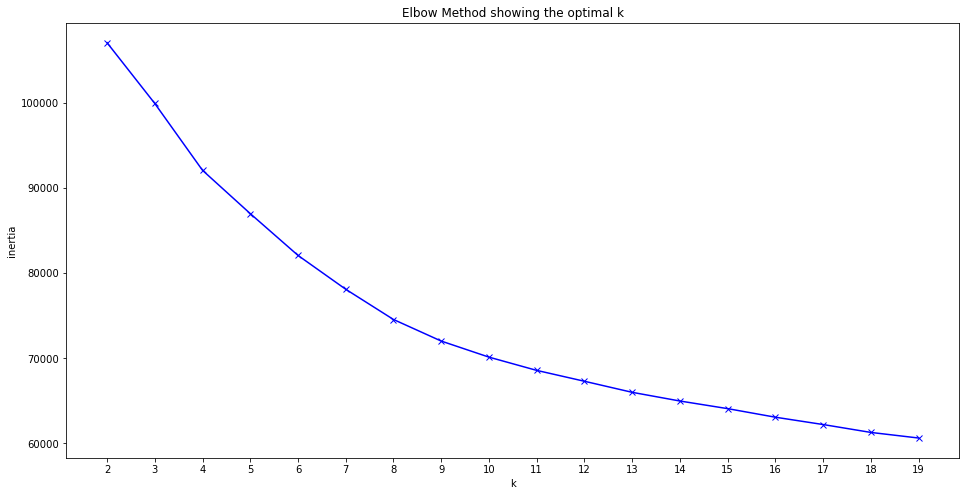

In [74]:
K = range(2, 20)
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

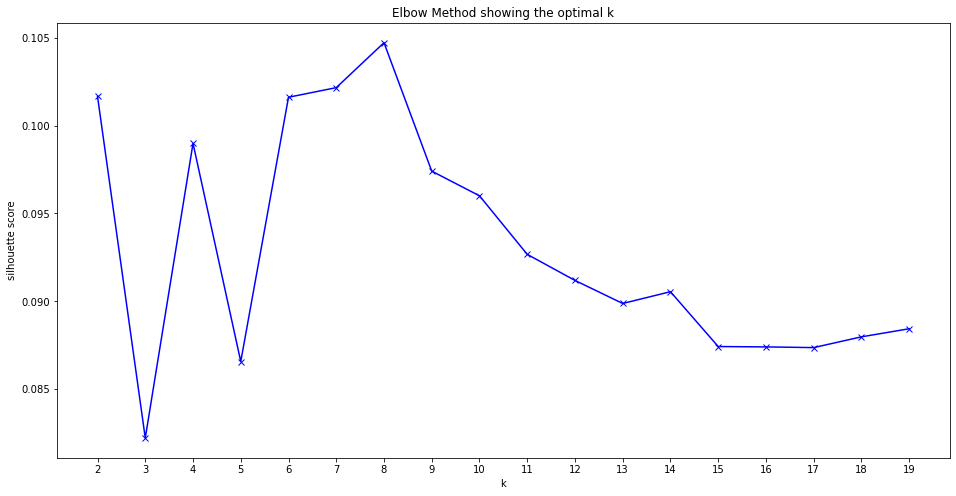

In [75]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [76]:
#I need to try with 4clusters, 4 and 8 clusters.

In [77]:
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=50,
                tol=0,
                random_state=1234)
kmeans.fit(x_standardized)
print(kmeans.inertia_)

92005.46744178995


In [78]:
kmeans = KMeans(n_clusters=6,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=50,
                tol=0,
                random_state=1234)
kmeans.fit(x_standardized)
print(kmeans.inertia_)

82086.83678657953


In [79]:
kmeans = KMeans(n_clusters=8,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=50,
                tol=0,
                random_state=1234)
kmeans.fit(x_standardized)
print(kmeans.inertia_)

74552.85212430567


In [80]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(x_standardized)
predict = kmeans.predict(x_standardized)
pd.Series(clusters).value_counts().sort_index()

0    3087
1    3164
2    3648
dtype: int64

In [81]:
y=Spoty

In [82]:

len(clusters)


9899

In [83]:
X['clusters']=clusters

In [84]:
X.head()

Unnamed: 0  Unnamed: 1  danceability  energy  key  loudness  mode  \
0           0           0         0.749   0.835    1    -3.423     1   
1           1           0         0.814   0.785    8    -2.081     1   
2           2           0         0.902   0.612   10    -6.217     0   
3           3           0         0.862   0.616    1   -10.760     1   
4           4           0         0.722   0.639    2    -6.959     1   

   speechiness  acousticness  instrumentalness  liveness  valence   tempo  \
0        0.352      0.603000          0.000081    0.0526    0.751  89.067   
1        0.238      0.058400          0.000015    0.3740    0.677  94.086   
2        0.283      0.135000          0.000000    0.3740    0.681  91.386   
3        0.223      0.003240          0.000592    0.3210    0.552  91.065   
4        0.373      0.000917          0.000028    0.3520    0.324  90.972   

   clusters  
0         2  
1         2  
2         2  
3         0  
4         0

In [85]:
X.shape

(9899, 14)

In [86]:
X2= X.reset_index(drop=True)

In [87]:
X2.head()

Unnamed: 0  Unnamed: 1  danceability  energy  key  loudness  mode  \
0           0           0         0.749   0.835    1    -3.423     1   
1           1           0         0.814   0.785    8    -2.081     1   
2           2           0         0.902   0.612   10    -6.217     0   
3           3           0         0.862   0.616    1   -10.760     1   
4           4           0         0.722   0.639    2    -6.959     1   

   speechiness  acousticness  instrumentalness  liveness  valence   tempo  \
0        0.352      0.603000          0.000081    0.0526    0.751  89.067   
1        0.238      0.058400          0.000015    0.3740    0.677  94.086   
2        0.283      0.135000          0.000000    0.3740    0.681  91.386   
3        0.223      0.003240          0.000592    0.3210    0.552  91.065   
4        0.373      0.000917          0.000028    0.3520    0.324  90.972   

   clusters  
0         2  
1         2  
2         2  
3         0  
4         0

In [88]:
y=Spoty

In [89]:
y.shape

(10000, 2)

In [90]:
y.head()

artist                             title
0                  G-Unit                      Ready Or Not
1                The Game                          Too Much
2                Ice Cube  Hello - Feat. Dr. Dre And MC Ren
3  Masta Ace Incorporated                 Sittin' On Chrome
4            Wu-Tang Clan        Triumph (feat. Cappadonna)

In [91]:
songs_final=pd.concat((y,X2),axis=1)

In [92]:
songs_final.isna().sum()

artist                0
title                 0
Unnamed: 0          101
Unnamed: 1          101
danceability        101
energy              101
key                 101
loudness            101
mode                101
speechiness         101
acousticness        101
instrumentalness    101
liveness            101
valence             101
tempo               101
clusters            101
dtype: int64

In [93]:
songs_final

artist                             title  Unnamed: 0  \
0                     G-Unit                      Ready Or Not         0.0   
1                   The Game                          Too Much         1.0   
2                   Ice Cube  Hello - Feat. Dr. Dre And MC Ren         2.0   
3     Masta Ace Incorporated                 Sittin' On Chrome         3.0   
4               Wu-Tang Clan        Triumph (feat. Cappadonna)         4.0   
...                      ...                               ...         ...   
9995                     Nas                          My Bible         NaN   
9996               Nate Dogg              Never Leave Me Alone         NaN   
9997                  Kurupt                     First We Pray         NaN   
9998               Val Young                  Just Another Day         NaN   
9999                Warren G                           Friends         NaN   

      Unnamed: 1  danceability  energy   key  loudness  mode  speechiness  \
0            0.0         0.749   0.835   1.0    -3.423   1.0        0.352   
1            0.0         0.814   0.785   8.0    -2.081   1.0        0.238   
2            0.0         0.902   0.612  10.0    -6.217   0.0        0.283   
3            0.0         0.862   0.616   1.0   -10.760   1.0        0.223   
4            0.0         0.722   0.639   2.0    -6.959   1.0        0.373   
...          ...           ...     ...   ...       ...   ...          ...   
9995         NaN           NaN     NaN   NaN       NaN   NaN          NaN   
9996         NaN           NaN     NaN   NaN       NaN   NaN          NaN   
9997         NaN           NaN     NaN   NaN       NaN   NaN          NaN   
9998         NaN           NaN     NaN   NaN       NaN   NaN          NaN   
9999         NaN           NaN     NaN   NaN       NaN   NaN          NaN   

      acousticness  instrumentalness  liveness  valence   tempo  clusters  
0         0.603000          0.000081    0.0526    0.751  89.067       2.0  
1         0.058400          0.000015    0.3740    0.677  94.086       2.0  
2         0.135000          0.000000    0.3740    0.681  91.386       2.0  
3         0.003240          0.000592    0.3210    0.552  91.065       0.0  
4         0.000917          0.000028    0.3520    0.324  90.972       0.0  
...            ...               ...       ...      ...     ...       ...  
9995           NaN               NaN       NaN      NaN     NaN       NaN  
9996           NaN               NaN       NaN      NaN     NaN       NaN  
9997           NaN               NaN       NaN      NaN     NaN       NaN  
9998           NaN               NaN       NaN      NaN     NaN       NaN  
9999           NaN               NaN       NaN      NaN     NaN       NaN  

[10000 rows x 16 columns]

In [94]:
songs_final=songs_final.dropna()

In [95]:
###define a function

In [98]:
# functions steps

# - 1) code for searching any song in spotify
results = sp.search(q='input', limit=50)

# - 2) code for getting the audio_feature of a song
song_uri = results['tracks']['items'][0]['uri']

# - 3) getting the uri
audio_features = sp.audio_features(song_uri)

# - 4) code for transforming new audio features of song into dataframe
audio_features_df = pd.DataFrame(audio_features)

# - 5) transform into numbers 
x_audio_features_df = audio_features_df.select_dtypes(include=np.number)

# - 6) scale new song
x_scaler_audio_features = scaler.transform(x_audio_features_df)

# - 7) KMeans fit and give new cluster for input song
cluster_input_song = kmeans.predict(x_scaler_audio_features)


In [103]:

def spotify(x):
    if userinput not in list(Billboard['title']): 
        results = sp.search(q=x, limit=50)
        song_uri = results['tracks']['items'][0]['uri']
        audio_features = sp.audio_features(song_uri)
        audio_features_df = pd.DataFrame(audio_features)
        x_audio_features_df = audio_features_df.select_dtypes(include=np.number)
        
        cluster_input_song = kmeans.predict(x_audio_features_df)
        print(songs_final[songs_final['clusters'] == cluster_input_song[1]].sample()[['title','artist']])
    else:
        x=random.choice(Billboard['title'])
        print("your song",userinput,'is superhot')
        print('if you like',userinput,'you may also like', x)

In [104]:
x_scaler_audio_features

array([[-1.73152522e+00,  4.51000000e-01,  2.34035472e+01,
        -7.79005217e+01, -1.21347536e+00,  2.58379896e+00,
        -6.72601520e-01,  4.36204591e+00, -1.21356596e-01,
         4.65576738e-01,  5.42128305e+02,  9.39963562e+05,
        -3.42111885e+00]])

In [105]:
userinput = input('').title()
spotify(userinput)

Peaches
your song Peaches is superhot
if you like Peaches you may also like Astronaut In The Ocean


In [106]:
userinput = input('').title()
spotify(userinput)

Rapstar
your song Rapstar is superhot
if you like Rapstar you may also like Lady


In [107]:
solution= songs_final[songs_final['title']== "Me And My Girlfriend"]

In [108]:
solution

artist                 title  Unnamed: 0  Unnamed: 1  danceability  \
2491  Makaveli  Me And My Girlfriend      2491.0         0.0         0.828   

      energy  key  loudness  mode  speechiness  acousticness  \
2491   0.892  4.0    -4.567   0.0        0.193         0.115   

      instrumentalness  liveness  valence  tempo  clusters  
2491               0.0     0.217    0.712  85.95       2.0